Model Building
# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
df=pd.read_csv('/content/car performance.csv')

In [9]:
df.head(30)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


## Finding missing data

In [10]:
df.isnull().any()


mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [11]:
df['horsepower']=df['horsepower'].replace('?',np.nan)
df['horsepower'].isnull().sum()

0

In [12]:
df['horsepower']=df['horsepower'].astype('float64')
df['horsepower'].fillna((df['horsepower'].mean()),inplace=True)
df.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [13]:
df.info() #Pandas dataframe.info() function is used to get a quick overview of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [14]:
df.describe() #Pandas describe() is used to view some basic statistical details of a data frame or a series of numeric values.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.165829,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.298676,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [15]:
df=df.drop('car name',axis=1) #dropping the unwanted column.
corr_table=df.corr()#Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. 
corr_table


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.777501,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.842437,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.897082,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.777501,0.842437,0.897082,1.000000,0.863990,-0.686436,-0.417081,-0.452386
weight,-0.831741,0.896017,0.932824,0.863990,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686436,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.417081,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452386,-0.581024,0.205873,0.180662,1.000000


## Data Visualizations

Heatmap : which represents correlation between attributes

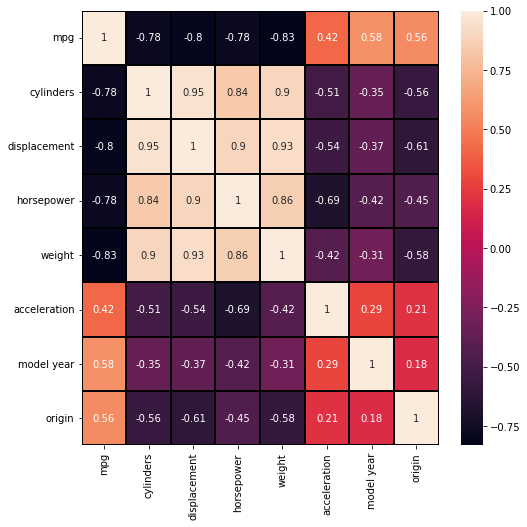

In [17]:
sns.heatmap(df.corr(),annot=True,linecolor ='black', linewidths = 1)#Heatmap is a way to show some sort of matrix plot,annot is used for correlation.
fig=plt.gcf()
fig.set_size_inches(8,8)

## Visualizations of each attributes w.r.t rest of all attributes

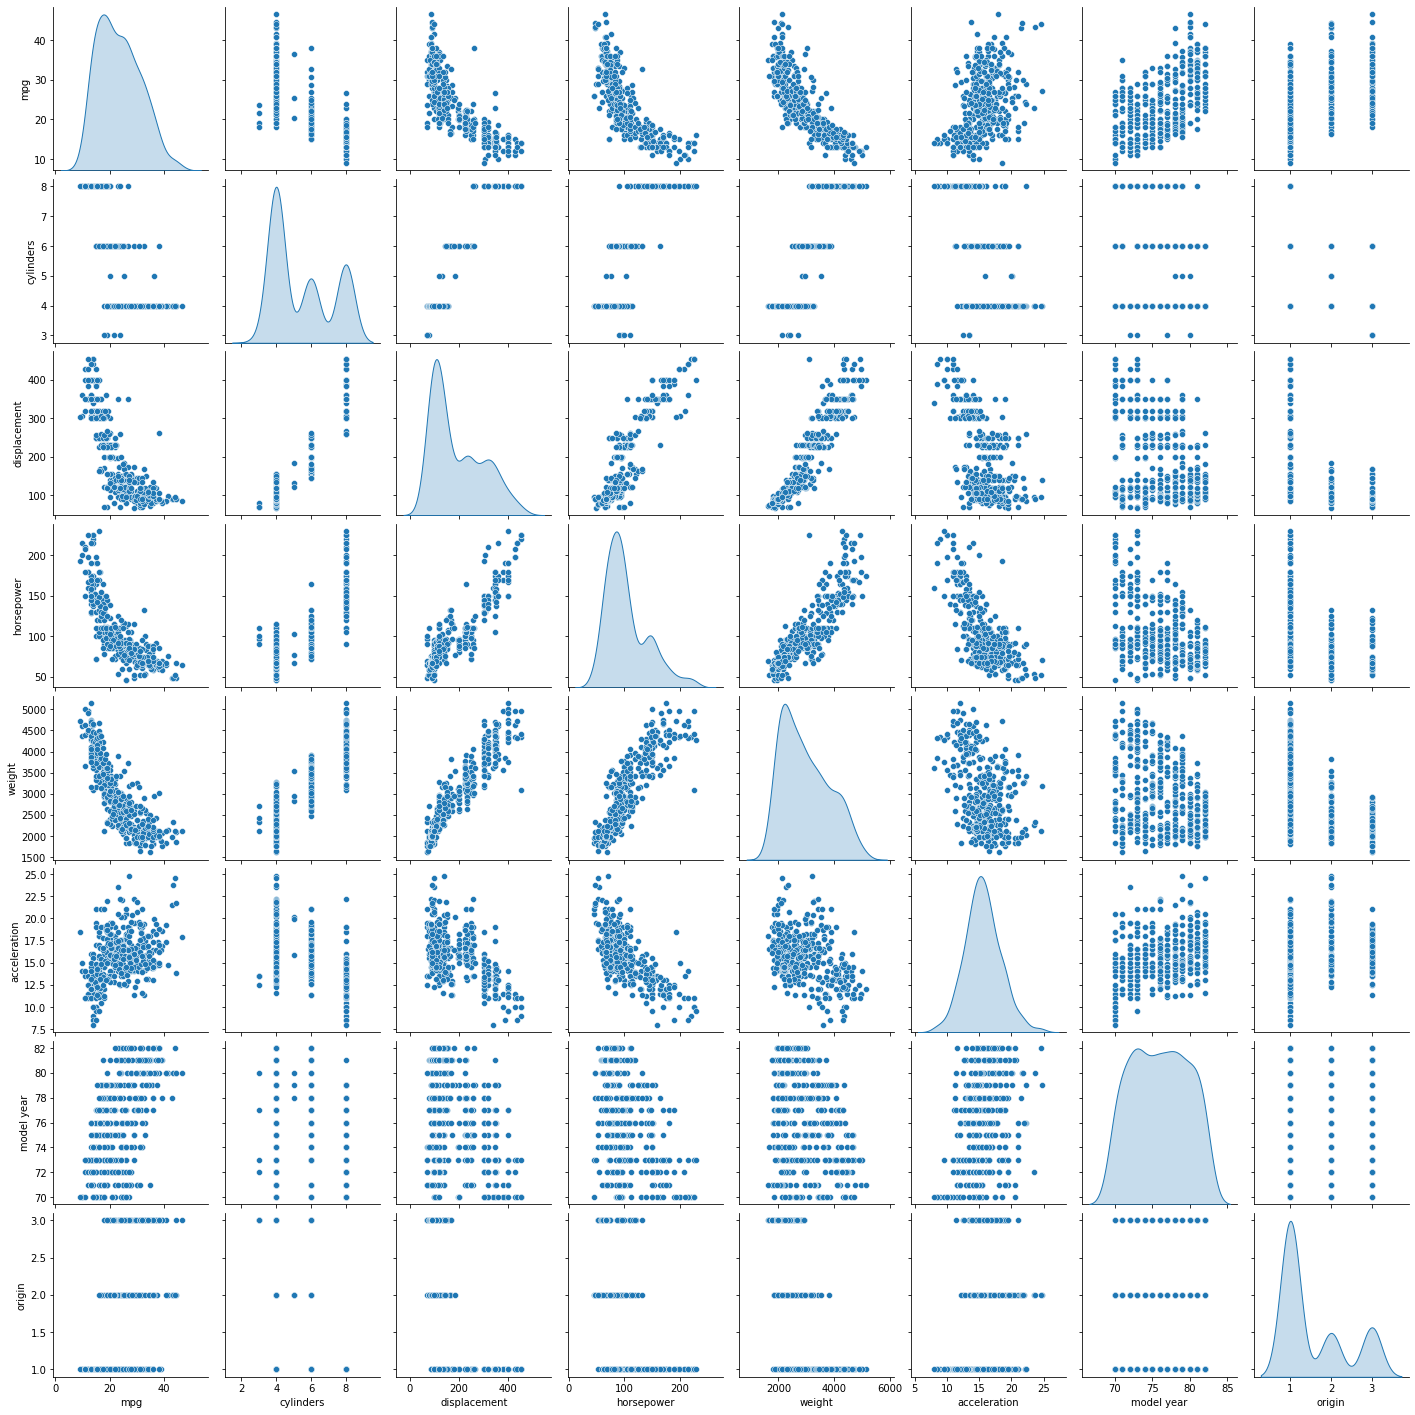

In [18]:
sns.pairplot(df,diag_kind='kde') #pairplot represents pairwise relation across the entire dataframe.
plt.show()

Regression plots(regplot()) creates a regression line between 2 parameters and helps to visualize their linear relationships.

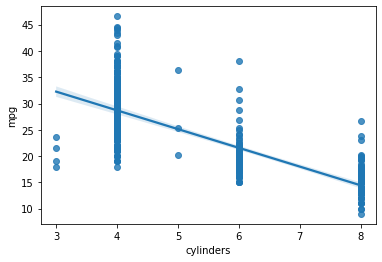

In [20]:
sns.regplot(x="cylinders", y="mpg", data=df)


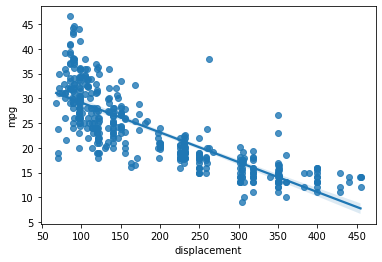

In [21]:
sns.regplot(x="displacement", y="mpg", data=df)

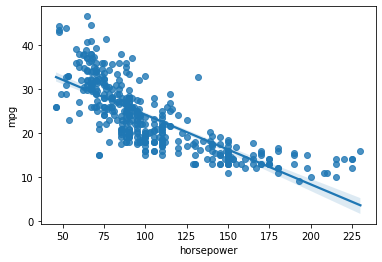

In [22]:
sns.regplot(x="horsepower", y="mpg", data=df)

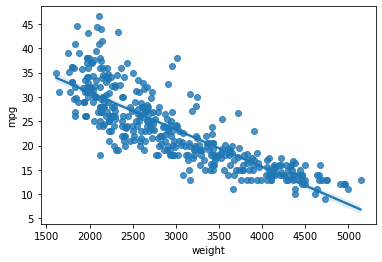

In [23]:
sns.regplot(x="weight", y="mpg", data=df)


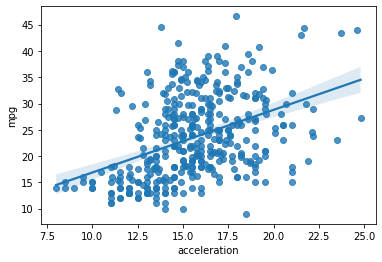

In [24]:
sns.regplot(x="acceleration", y="mpg", data=df)

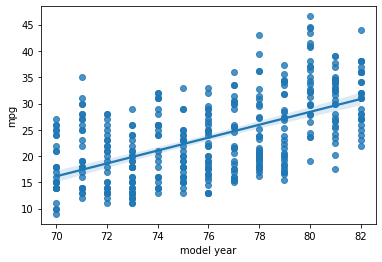

In [25]:
sns.regplot(x="model year", y="mpg", data=df)

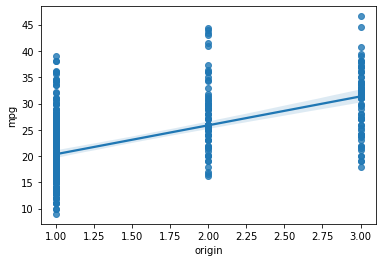

In [26]:
sns.regplot(x="origin", y="mpg", data=df)

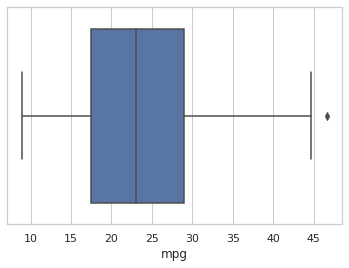

In [28]:
sns.set(style="whitegrid")
sns.boxplot(x=df["mpg"])

The P-value is the probability value that the correlation between these two variables is statistically significant.
## New Section

Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

p-value is  0.001: we say there is strong evidence that the correlation is significant.
the p-value is  0.05: there is moderate evidence that the correlation is significant.
the p-value is  0.1: there is weak evidence that the correlation is significant.
the p-value is  0.1: there is no evidence that the correlation is significant.

In [29]:
from scipy import stats

## Cylinders vs mpg

Let's calculate the Pearson Correlation Coefficient and P-value of 'Cylinders' and 'mpg'.

In [30]:
pearson_coef, p_value = stats.pearsonr(df['cylinders'], df['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.7753962854205542  with a P-value of P = 4.503992246177055e-81


## Conclusion:

Since the p-value is < 0.001, the correlation between cylinders and mpg is statistically significant, and the coefficient of ~ -0.775 shows that the relationship is negative and moderately strong.

## Displacement vs mpg

Let's calculate the Pearson Correlation Coefficient and P-value of 'Displacement' and 'mpg'.

In [31]:
pearson_coef, p_value = stats.pearsonr(df['displacement'], df['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.8042028248058978  with a P-value of P = 1.6558889101930157e-91


## Conclusion:

Since the p-value is  < 0.1, the correlation between displacement and mpg is statistically significant, and the linear negative relationship is quite strong (~-0.809, close to -1)

## Horsepower vs **mpg**

# Let's calculate the Pearson Correlation Coefficient and P-value of 'horsepower' and 'mpg'.

In [33]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.7775013636276671  with a P-value of P = 8.802190914914203e-82


## Conclusion:

Since the p-value is < 0.001, the correlation between horsepower and mpg is statistically significant, and the coefficient of ~ -0.771 shows that the relationship is negative and moderately strong.

## Weight vs mpg


Let's calculate the Pearson Correlation Coefficient and P-value of 'weight' and 'mpg'.

In [34]:
pearson_coef, p_value = stats.pearsonr(df['weight'], df['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.831740933244335  with a P-value of P = 2.9727995640500577e-103


## Conclusion:

Since the p-value is < 0.001, the correlation between weight and mpg is statistically significant, and the linear negative relationship is quite strong (~-0.831, close to -1)

## Acceleration vs mpg

In [36]:
pearson_coef, p_value = stats.pearsonr(df['acceleration'], df['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.4202889121016507  with a P-value of P = 1.823091535078553e-18


## Conclusion:

Since the p-value is < 0.1, the correlation between acceleration and mpg is statistically significant, but the linear relationship is weak (~0.420).

## Model year vs mpg

In [38]:
pearson_coef, p_value = stats.pearsonr(df['model year'], df['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.5792671330833096  with a P-value of P = 4.844935813365483e-37


## Conclusion:

Since the p-value is < 0.001, the correlation between model year and mpg is statistically significant, but the linear relationship is only moderate (~0.579).

## Origin vs mpg

In [40]:
pearson_coef, p_value = stats.pearsonr(df['origin'], df['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.5634503597738431  with a P-value of P = 1.0114822102336483e-34


## Conclusion:

Since the p-value is < 0.001, the correlation between origin and mpg is statistically significant, but the linear relationship is only moderate (~0.563).

## Ordinary Least Squares Statistics

In [41]:
test=smf.ols('mpg~cylinders+displacement+horsepower+weight+acceleration+origin',df).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     167.6
Date:                Wed, 16 Nov 2022   Prob (F-statistic):          8.18e-105
Time:                        10:36:32   Log-Likelihood:                -1129.2
No. Observations:                 398   AIC:                             2272.
Df Residuals:                     391   BIC:                             2300.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       43.4941      2.690     16.171      0.000      38.206      48.782
cylinders       -0.5537      0.402     -1.377      0.169      -1.344       0.237
displacement     0.0125      0.009      1.335      0.183      -0.006       0.031
horsepower      -0.0628      0.017     -3.797      0.000      -0.095      -0.030
weight          -0.0049      0.001     -6.168      0.000      -0.006      -0.003
acceleration    -0.0402      0.121     -0.332      0.740      -0.278       0.198
origin           1.4880      0.345      4.315      0.000       0.810       2.166
==============================================================================
Omnibus:                       31.632   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.557
Skew:                           0.613   Prob(JB):                     9.46e-10
Kurtosis:                       4.002   Cond. No.                     4.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Seperating into Dependent and Independent variables

Independent variables

In [42]:
x=df[['cylinders','displacement','horsepower','weight','model year','origin']].values
x

array([[8.000e+00, 3.070e+02, 1.300e+02, 3.504e+03, 7.000e+01, 1.000e+00],
       [8.000e+00, 3.500e+02, 1.650e+02, 3.693e+03, 7.000e+01, 1.000e+00],
       [8.000e+00, 3.180e+02, 1.500e+02, 3.436e+03, 7.000e+01, 1.000e+00],
       ...,
       [4.000e+00, 1.350e+02, 8.400e+01, 2.295e+03, 8.200e+01, 1.000e+00],
       [4.000e+00, 1.200e+02, 7.900e+01, 2.625e+03, 8.200e+01, 1.000e+00],
       [4.000e+00, 1.190e+02, 8.200e+01, 2.720e+03, 8.200e+01, 1.000e+00]])

## Dependent variables

In [43]:
y=df.iloc[:,0:1].values
y

array([[18. ],
       [15. ],
       [18. ],
       [16. ],
       [17. ],
       [15. ],
       [14. ],
       [14. ],
       [14. ],
       [15. ],
       [15. ],
       [14. ],
       [15. ],
       [14. ],
       [24. ],
       [22. ],
       [18. ],
       [21. ],
       [27. ],
       [26. ],
       [25. ],
       [24. ],
       [25. ],
       [26. ],
       [21. ],
       [10. ],
       [10. ],
       [11. ],
       [ 9. ],
       [27. ],
       [28. ],
       [25. ],
       [25. ],
       [19. ],
       [16. ],
       [17. ],
       [19. ],
       [18. ],
       [14. ],
       [14. ],
       [14. ],
       [14. ],
       [12. ],
       [13. ],
       [13. ],
       [18. ],
       [22. ],
       [19. ],
       [18. ],
       [23. ],
       [28. ],
       [30. ],
       [30. ],
       [31. ],
       [35. ],
       [27. ],
       [26. ],
       [24. ],
       [25. ],
       [23. ],
       [20. ],
       [21. ],
       [13. ],
       [14. ],
       [15. ],
       [14. ],
       [17

## Splitting into train and test data.

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

## Normalisation

In [45]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
x_train = sd.fit_transform(x_train)
x_test = sd.fit_transform(x_test)
y_train = sd.fit_transform(y_train)
y_test = sd.fit_transform(y_test)

x_train

array([[ 1.46858608,  2.48230464,  2.97979869,  1.62455076, -1.61295698,
        -0.71873488],
       [ 1.46858608,  1.48729292,  1.55782064,  0.84358808, -1.61295698,
        -0.71873488],
       [-0.86550411, -0.70364636, -0.63978179, -0.36507278,  0.82235108,
        -0.71873488],
       ...,
       [-0.86550411, -1.21071964, -1.44126033, -1.31380657, -0.80118763,
         0.53032865],
       [ 0.30154098,  0.53055088, -0.12269887,  0.35799706, -1.3423672 ,
        -0.71873488],
       [-0.86550411, -1.00023639, -0.87246911, -0.89319732, -0.26000806,
         0.53032865]])

## Decision tree regressor

In [46]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=0,criterion="mae")
dt.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mae', random_state=0)

In [47]:
import pickle
pickle.dump(dt,open('decision_model.pkl','wb'))
y_pred=dt.predict(x_test)
y_pred

array([-1.21248604, -0.17830889, -1.21248604, -0.43685318, -0.82466961,
        0.98514039,  2.07102639, -0.17830889, -1.08321389,  0.20950753,
        2.74324153,  2.74324153, -0.43685318,  0.33877968, -0.95394175,
        1.6315011 ,  0.46805182,  0.31292525, -0.82466961,  1.24368468,
       -0.95394175, -0.04903675, -0.24294497, -0.56612532,  1.39881125,
        0.20950753,  0.79123218,  0.98514039,  0.98514039, -0.43685318,
       -0.88930568,  1.11441253, -1.08321389,  1.04977646, -0.54027089,
        0.05438096, -1.08321389, -0.95394175,  0.79123218, -1.60030246])

In [48]:
y_test

array([[-1.29002284],
       [ 0.03307751],
       [-1.41030469],
       [-0.44804989],
       [-0.80889544],
       [ 1.23589601],
       [ 1.12764234],
       [-0.56833174],
       [-1.16974099],
       [-0.14734527],
       [ 1.94555892],
       [ 1.50051608],
       [-0.80889544],
       [-0.20748619],
       [-1.10960007],
       [ 1.3200933 ],
       [ 0.75476861],
       [ 0.27364121],
       [-0.80889544],
       [ 1.51254426],
       [-1.10960007],
       [-0.20748619],
       [-0.08720434],
       [-0.80889544],
       [ 1.17575508],
       [ 0.08119025],
       [ 1.36820604],
       [ 1.11561416],
       [ 0.63448676],
       [-1.04945914],
       [-0.73672633],
       [ 1.47645971],
       [-1.16974099],
       [ 1.05547323],
       [-0.2796553 ],
       [-0.08720434],
       [-0.68861359],
       [-0.94120548],
       [ 0.86302227],
       [-1.53058654]])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


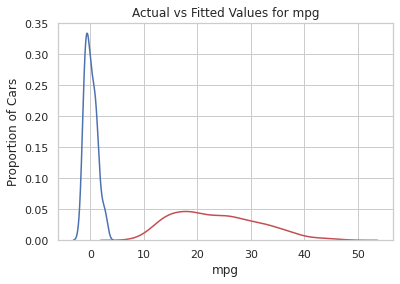

In [49]:
ax1 = sns.distplot(df['mpg'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for mpg')
plt.xlabel('mpg')
plt.ylabel('Proportion of Cars')
 
plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

# R-squared

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

R-squared = Explained variation / Total variation

## Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

In [50]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)

0.8578094522360582

In [51]:
mean_squared_error(y_test,y_pred)

0.14219054776394183

In [52]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.377081619498938

## Random Forest Regressor

In [53]:
from sklearn.ensemble import RandomForestRegressor
x11 = df.iloc[:,1:8].values
y11 = df.iloc[:,0].values
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x11,y11,test_size=0.2,random_state=0)
rf= RandomForestRegressor(n_estimators=30,random_state=0)
rf.fit(x_train1,y_train1)

RandomForestRegressor(n_estimators=30, random_state=0)

In [54]:
y1_pred=rf.predict(x_test1)
y1_pred

array([14.3       , 24.34333333, 14.18333333, 20.26666667, 18.43333333,
       30.21666667, 34.96      , 21.3       , 15.36666667, 26.22333333,
       36.01333333, 36.5       , 18.95666667, 27.22333333, 16.47666667,
       32.54333333, 27.89333333, 27.17      , 16.86666667, 34.64333333,
       15.88333333, 23.3       , 23.48333333, 20.71666667, 32.22      ,
       27.23333333, 34.40666667, 30.03      , 31.76333333, 15.93333333,
       19.07666667, 33.32333333, 18.55      , 32.66      , 20.35666667,
       24.2       , 18.92      , 16.40666667, 35.24      , 12.3       ,
       13.4       , 15.4       , 27.89666667, 32.61333333, 29.06666667,
       22.1       , 19.83      , 14.8       , 22.11333333, 29.86666667,
       34.04      , 25.36666667, 16.34      , 27.4       , 15.4       ,
       12.36666667, 18.56666667, 25.32666667, 31.78333333, 16.24      ,
       18.87      , 25.77666667, 18.96666667, 21.53333333, 13.26666667,
       15.11666667, 13.46666667, 17.26333333, 24.95666667, 14.  

In [55]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test1, y1_pred)
accuracy

0.8999792555413947

In [56]:
from sklearn.ensemble import RandomForestClassifier

x = df.iloc[:,3:7].values
y = df.iloc[:,7].values

from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
z = one.fit_transform(x[:,1:2]).toarray()
x = np.delete(x,1,axis = 1)
x = np.concatenate((z,x),axis = 1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state = 42)


from sklearn.model_selection import train_test_split
x1 = [1,2,3,4,5,6,7,8,9,10]
y1 = [1,0,1,0,1,0,1,0,1,0]

for i in range(5):
    x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size = 0.2, random_state = 2)
    print(x_train1, "Without random state")


[6, 1, 8, 3, 4, 7, 10, 9] Without random state
[6, 1, 8, 3, 4, 7, 10, 9] Without random state
[6, 1, 8, 3, 4, 7, 10, 9] Without random state
[6, 1, 8, 3, 4, 7, 10, 9] Without random state
[6, 1, 8, 3, 4, 7, 10, 9] Without random state


In [57]:
rf= RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [58]:
y_pred2=rf.predict(x_test)
y_pred2

array([3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 3, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


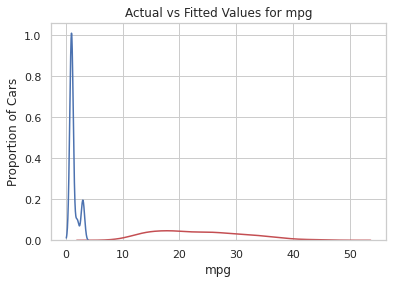

In [59]:
ax1 = sns.distplot(df['mpg'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred2, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for mpg')
plt.xlabel('mpg')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

In [60]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred2)

-0.04347826086956519

In [61]:
mean_squared_error(y_test,y_pred2)

0.6

In [62]:
np.sqrt(mean_squared_error(y_test,y_pred2))

0.7745966692414834

## Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression
mr=LinearRegression()
mr.fit(x_train,y_train)

LinearRegression()

In [64]:
y_pred3=mr.predict(x_test)
y_pred3

array([ 1.61213674e+10, -2.63960229e+09, -2.63960229e+09, -2.63960229e+09,
       -2.63960229e+09, -2.63960229e+09, -2.63960229e+09, -2.63960229e+09,
       -2.63960229e+09, -2.63960229e+09, -2.63960229e+09,  2.95124435e+00,
        2.77712881e+10, -2.63960229e+09,  3.03435230e+00, -2.63960229e+09,
       -2.63960229e+09, -2.63960229e+09, -2.63960229e+09, -4.86033517e+10,
       -2.63960229e+09, -2.63960229e+09, -2.63960229e+09, -2.63960229e+09,
       -2.63960229e+09,  2.62085199e+00,  3.30797434e+00, -2.63960229e+09,
        1.66822052e+00, -2.63960229e+09, -2.63960229e+09, -2.63957970e+09,
       -2.63960229e+09, -2.63960229e+09, -2.63960229e+09, -2.63960229e+09,
       -2.63960229e+09,  1.60079002e+00, -2.63960229e+09, -2.63960229e+09,
       -2.63960229e+09, -6.29269102e+10, -2.63960229e+09, -2.63960229e+09,
       -2.63960229e+09, -2.63960229e+09, -2.63960229e+09, -2.63960229e+09,
       -2.63960229e+09, -2.63960229e+09,  5.85052490e-01,  2.73083973e+00,
       -2.63960229e+09, -

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


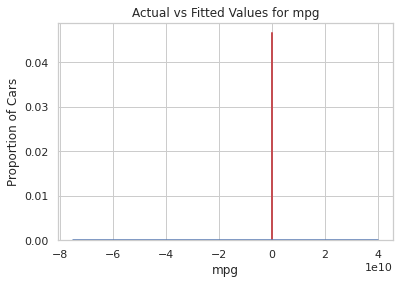

In [65]:
ax1 = sns.distplot(df['mpg'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred3, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for mpg')
plt.xlabel('mpg')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are not as close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

In [66]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred3)

-1.748936549392819e+20

In [67]:
mean_squared_error(y_test,y_pred3)

1.005638515900871e+20

In [68]:
np.sqrt(mean_squared_error(y_test,y_pred3))

10028152950.074461

## Conclusion:

When comparing models, the model with the higher R-squared value is a better fit for the data.

When comparing models, the model with the smallest MSE value is a better fit for the data.

Comparing these three models, we conclude that the DecisionTree model is the best model to be able to predict mpg from our dataset. But We use Random Forest Regressor

In [69]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.1 MB/s 
     |████████████████████████████████| 51 kB 613 kB/s 
     |████████████████████████████████| 824 kB 40.1 MB/s 
     |████████████████████████████████| 133 kB 49.8 MB/s 
     |████████████████████████████████| 547 kB 49.5 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=3707febb9b50ad53e3a32416963e2bf233c9ed7f0e14eb9f244c615a633d6c52
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=9e9acd6ed1345164c373d13fa3b46bc6597bcab9406d30d67f805e6fbf3a5d1a
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_

In [70]:
from ibm_watson_machine_learning import APIClient
wml_credentials = { 
                "url": "https://us-south.ml.cloud.ibm.com",
                "apikey": "isS3P7auiIh4rzYJVtIMforGUPRhkBUhxz1GPVFJ_MbV"
}
client = APIClient(wml_credentials)

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [71]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space["resources"] if item["entity"]["name"] == space_name)["metadata"]["id"])
space_uid = guid_from_space_name(client, "models")
print("Space UID = " + space_uid)

Space UID = 59e74fb8-5c13-4ff3-b36a-9e909d8603e6


In [72]:
client.set.default_space(space_uid)

'SUCCESS'

In [73]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [74]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [75]:
model_details = client.repository.store_model(model=rf,meta_props={
    client.repository.ModelMetaNames.NAME : "Model Building",
    client.repository.ModelMetaNames.TYPE : "scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid }
                                             )

model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


In [76]:
model_id

'035326fd-292a-46ef-8d6a-5a2fe53d574d'